In [1]:
import numpy as np
import matplotlib.pyplot as plt

## First, let's initialize some low-dimensional (ground truth) data in a high-dimensional space...

In [29]:
# true dimensions of interest
# NOTE: in high dimensions, randomly chosen directions tend to be nearly orthogonal

num_data = 1_000    # number of data points (e.g. time steps in a recording)
dim = 100           # number of dimensions in data (e.g. number of neurons in the recording)

# generate two ground truth directions that data should fall along, up to slight (noisy) perturbations
v1 = np.random.normal(size=dim)
v1 /= np.linalg.norm(v1)

v2 = np.random.normal(size=dim)
v2 /= np.linalg.norm(v2)

noise_std = 0.05

# generate the data
X = np.zeros((num_data, dim))
for i in range(num_data):
    noise_vec = noise_std * np.random.normal(size=dim)

    if i < num_data / 2:
        X[i, :] = v1 * np.random.normal() + noise_vec
    else:
        X[i, :] = v2 * np.random.normal() + noise_vec




## Do we suspect that the data is low dimensional?

We can quantify this by first computing the covariance matrix $C = \frac1n X^T X \in \mathbb{R}^{\text{num_features } \times \text{ num_features}}$ (note that $X \in \mathbb{R}^{\text{num_data } \times \text{ num_features}}$), and then calculating its **participation ratio** $\rho = \frac{(\text{Tr}(C))^2}{\text{Tr}(C^2)}$.

Here, the trace operator $\text{Tr}$ is the (linear) function that takes in an $N \times N$ matrix and outputs the sum of the diagonal elements of that matrix: $\text{Tr}(A) = \sum_{i=1}^N A_{ii}$. Interestingly, it turns out that the trace of a matrix is *also* the sum of its eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_N$.

**Question:** Show that the eigenvalues of $C^2$ are $\lambda_1^2, \dots, \lambda_N^2$. Using this, and the fact that the trace operator returns the sum of the eigenvalues, show that $\rho = \frac{\left(\sum_{k=1}^N \lambda_k\right)^2}{\sum_{k=1}^N \lambda_k^2}$.

Collectively, the number of nonzero eigenvalues and their relative sizes tells us how much the data features tend to vary among the different eigenvector directions. In particular, if a lot of eigenvalues are zero, or close to zero, we should expect the data to be low-dimensional!

**Question:** Suppose that $\lambda_1 = \lambda_2 = \dots = \lambda_N$. What does $\rho$ equal in this case? Now, suppose that $\lambda_1 \neq 0$ but that $\lambda_2 = \lambda_3 = \dots = \lambda_N = 0$; what is $\rho$ in this case? What if $\lambda_1 = \lambda_2 \neq 0$ and all other eigenvalues are zero?

Do you see how a lower participation ratio $\rho$ indicates lower data dimensionality?

## Now, compute the participation ratio of the data covariance matrix! Is it large or small relative to the total dimensionality $N$? Does this indicate we should try using PCA?

In [30]:
## ADD CODE HERE
# Hint: np.trace() is the numpy function that calculates the trace of a square matrix!

# C = ...
C = 1./num_data * X.T @ X

# rho = ...
rho = np.trace(C)**2 / np.trace(C @ C)


# print results
print(f'The participation ratio is {rho}, and the total data dimensionality is {X.shape[1]}.')


The participation ratio is 3.053532343684065, and the total data dimensionality is 100.


## Now, compute the covariance matrix of the data, and compute its SVD / eigendecomposition!

In [31]:
## ADD CODE HERE
# Hint: there's lots of functions for computing the eigendecomposition and/or SVD.
# There's np.linalg.eigh() (among others), and also some analogous scipy functions.

# C = ...
C = 1./num_data * X.T @ X

eigvals, eigvecs = np.linalg.eigh(C)

print(eigvals)
print(eigvecs.shape)

# U = ...
U = eigvecs[:, -2:]

# top_eigvals = ...
top_eigvals = eigvals[-2:]

print(U.shape)
print(top_eigvals)


[0.00122298 0.00125867 0.00129843 0.00131287 0.00134975 0.00138058
 0.00141533 0.00148428 0.00149789 0.00152344 0.00153807 0.0015761
 0.00158339 0.00161195 0.00162262 0.00164802 0.00166429 0.00170535
 0.00172979 0.00175068 0.00175913 0.00178696 0.00178938 0.00179998
 0.00182366 0.00186362 0.00186953 0.00190192 0.00193823 0.00197998
 0.00199594 0.00202011 0.00206481 0.00207369 0.00210983 0.00213008
 0.00214647 0.00216708 0.00218607 0.00219028 0.00220908 0.00223356
 0.00225953 0.00229093 0.00230276 0.00236291 0.00237905 0.00240487
 0.00243606 0.00243749 0.00244975 0.00248591 0.00250819 0.00253063
 0.00256071 0.00258242 0.00260746 0.00267171 0.00269315 0.00270669
 0.0027381  0.00276001 0.00278355 0.00279185 0.00283386 0.00286437
 0.00290529 0.00291961 0.00295483 0.00296028 0.00300981 0.00301796
 0.00305518 0.00307702 0.0031036  0.0031156  0.00316949 0.00321904
 0.00324697 0.00326155 0.003312   0.00336388 0.003382   0.00344235
 0.00350585 0.0035264  0.00358774 0.00360229 0.00363609 0.00364

## Finally, take the top two eigenvectors and project the data onto their span!

(1000, 2)


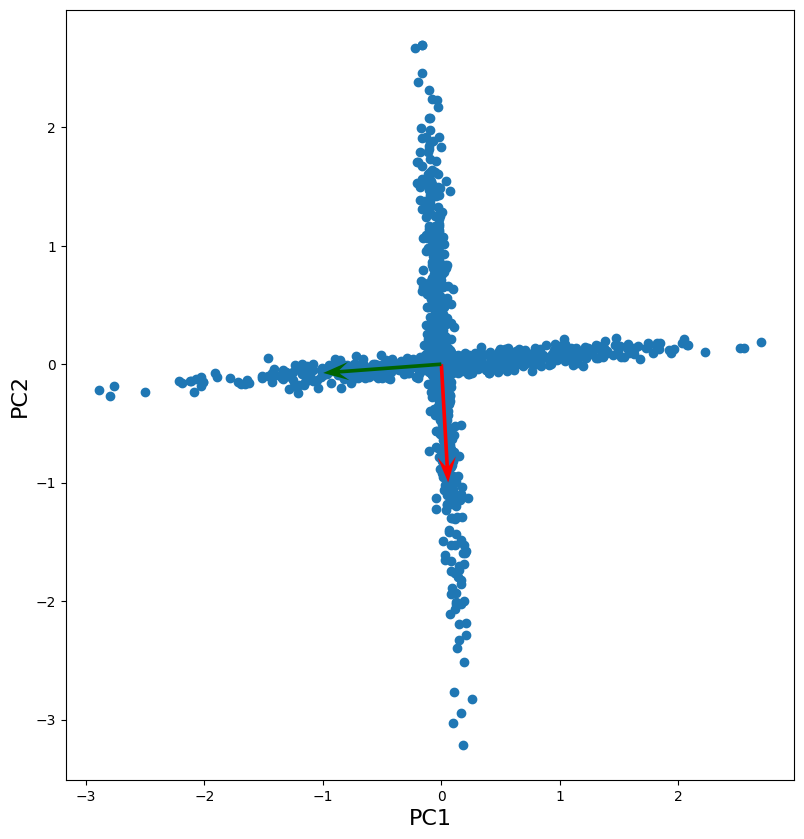

In [32]:
# ADD CODE HERE

# X_proj = ...  (something num_data x 2)
X_proj = X @ U
print(X_proj.shape)


# plot first two PC's of the data, along with
# the two ground truth direction vectors

v1_proj = U.T @ v1
v2_proj = U.T @ v2

plt.figure(figsize=(10, 10))
plt.plot(X_proj[:, 0], X_proj[:, 1], 'o', zorder=1)

plt.quiver(0, 0, v1_proj[0], v1_proj[1],
           angles='xy', scale_units='xy', scale=1,
           color='r', width=0.005, headwidth=5, headlength=7, zorder=3)

plt.quiver(0, 0, v2_proj[0], v2_proj[1],
           angles='xy', scale_units='xy', scale=1,
           color='darkgreen', width=0.005, headwidth=5, headlength=7, zorder=3)

plt.gca().set_aspect('equal')
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.show()

## How much of the variance did we explain with two PC's?



Recall that, intuitively, the sizes of the eigenvalues of the covariance matrix $C = \frac1n X^T X$ (where $n$ is the number of data) tell us to what extent the data varies along the different eigenvector directions. By using more principal components, we capture more and more of the variance along different eigen-directions.

To calculate what proportion of the variance in the data is accounted for with $k \leq N$ principal components, we arrange the eigenvalues in decreasing order as $\lambda_1, \lambda_2, \dots, \lambda_N$ and then compute the quantity $\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^N \lambda_i}$. Let us now compute the proportion of the variance explained in our present case:

In [33]:
# ADD CODE HERE

# top_2_eigvals = ...
top_2_eigvals = eigvals[-2:]

# total_eigval_sum = ...
total_eigval_sum = np.sum(eigvals)

# prop_var_explained = ...
prop_var_explained = np.sum(top_2_eigvals) / total_eigval_sum

print(f'Proportion of total variance in data explained with 2 PCs: {prop_var_explained}.')


Proportion of total variance in data explained with 2 PCs: 0.8048460779266586.


**Conceptual Question: ** Where is the remaining variance coming from? Is it important to capture this remaining variance?

## Congratulations, you are now a PCA wizard! Feel free to tinker around with any part of this exericse (e.g. the underlying data, the noise level, the number of PCs used, etc.) and see how the results change!